# 0. Setup Paths

In [131]:
import os

In [132]:
CUSTOM_MODEL_NAME = 'ssd_mobilenet_v1_fpn_tuned' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [133]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [134]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [135]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [136]:
# https://www.tensorflow.org/install/source_windows

In [137]:
if os.name=='nt':
    !pip install wget
    import wget

In [138]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [80]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
error: avro-python3 1.10.2 is installed but avro-python3!=1.9.2,<1.10.0,>=1.8.1 is required by {'apache-beam'}



copying build\lib\datasets\mnist.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\preprocess_imagenet_validation_data.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\process_bounding_boxes.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\visualwakewords.py -> build\bdist.win-amd64\egg\datasets
copying build\lib\datasets\__init__.py -> build\bdist.win-amd64\egg\datasets
creating build\bdist.win-amd64\egg\deployment
copying build\lib\deployment\model_deploy.py -> build\bdist.win-amd64\egg\deployment
copying build\lib\deployment\model_deploy_test.py -> build\bdist.win-amd64\egg\deployment
copying build\lib\deployment\__init__.py -> build\bdist.win-amd64\egg\deployment
creating build\bdist.win-amd64\egg\nets
copying build\lib\nets\alexnet.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\alexnet_test.py -> build\bdist.win-amd64\egg\nets
copying build\lib\nets\cifarnet.py -> build\bdist.win-amd64\egg\nets
copying build\lib

Obtaining file:///D:/Age/Tensorflow/models/research/slim
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [81]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2021-06-25 08:01:07.500332: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
Running tests under Python 3.9.5: D:\TFODCourse\tfod\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-06-25 08:01:10.341157: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-06-25 08:01:10.341180: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-06-25 08:01:10.344554: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: RACHAN-PC
2021-06-25 08:01:10.344692: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: RACHAN-PC
2021-06-25 08:01:10.345108: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use t

I0625 08:01:21.035202  4152 efficientnet_model.py:147] round_filter input=16 output=24
I0625 08:01:21.035202  4152 efficientnet_model.py:147] round_filter input=24 output=32
I0625 08:01:21.481358  4152 efficientnet_model.py:147] round_filter input=24 output=32
I0625 08:01:21.481358  4152 efficientnet_model.py:147] round_filter input=40 output=48
I0625 08:01:21.754657  4152 efficientnet_model.py:147] round_filter input=40 output=48
I0625 08:01:21.754919  4152 efficientnet_model.py:147] round_filter input=80 output=96
I0625 08:01:22.244250  4152 efficientnet_model.py:147] round_filter input=80 output=96
I0625 08:01:22.244250  4152 efficientnet_model.py:147] round_filter input=112 output=136
I0625 08:01:22.718221  4152 efficientnet_model.py:147] round_filter input=112 output=136
I0625 08:01:22.718221  4152 efficientnet_model.py:147] round_filter input=192 output=232
I0625 08:01:23.329086  4152 efficientnet_model.py:147] round_filter input=192 output=232
I0625 08:01:23.329086  4152 efficie

In [82]:
!pip install tensorflow --upgrade

In [44]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

Found existing installation: protobuf 3.17.3
Uninstalling protobuf-3.17.3:
  Successfully uninstalled protobuf-3.17.3


  ERROR: Command errored out with exit status 1:
   command: 'd:\tfodcourse\tfod\scripts\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\rascal\\AppData\\Local\\Temp\\pip-install-007yqg36\\matplotlib_2ef16a9f79844d8a8a7d4c3ed65f76f8\\setup.py'"'"'; __file__='"'"'C:\\Users\\rascal\\AppData\\Local\\Temp\\pip-install-007yqg36\\matplotlib_2ef16a9f79844d8a8a7d4c3ed65f76f8\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\rascal\AppData\Local\Temp\pip-wheel-_3xg3p4a'
       cwd: C:\Users\rascal\AppData\Local\Temp\pip-install-007yqg36\matplotlib_2ef16a9f79844d8a8a7d4c3ed65f76f8\
  Complete output (583 lines):


  Using cached protobuf-3.17.3-py2.py3-none-any.whl (173 kB)
  Using cached matplotlib-3.2.0.tar.gz (40.5 MB)
  Running setup.py clean for matplotlib
Failed to build matplotlib
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'



  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.2.0]
        python: yes [3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC
                    v.1928 64 bit (AMD64)]]
      platform: yes [win32]
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
           agg: yes [installing]
         tkagg: yes [installing; run-time loading from Python Tcl/Tk]
        macosx: no  [Mac OS-X only]
  
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  copying lib\pylab.py -> build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\afm.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\animation.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\artist.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\axis.py -> build\lib.win-amd64-3.9\matplot

  creating build\lib.win-amd64-3.9\matplotlib\mpl-data\stylelib
  copying lib\matplotlib\mpl-data\stylelib\seaborn-muted.mplstyle -> build\lib.win-amd64-3.9\matplotlib\mpl-data\stylelib
  copying lib\matplotlib\mpl-data\stylelib\seaborn-white.mplstyle -> build\lib.win-amd64-3.9\matplotlib\mpl-data\stylelib
  copying lib\matplotlib\mpl-data\images\subplots.gif -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  creating build\lib.win-amd64-3.9\matplotlib\backends\web_backend\jquery-ui-1.12.1
  creating build\lib.win-amd64-3.9\matplotlib\backends\web_backend\jquery-ui-1.12.1\images
  copying lib\matplotlib\backends\web_backend\jquery-ui-1.12.1\images\ui-icons_ffffff_256x240.png -> build\lib.win-amd64-3.9\matplotlib\backends\web_backend\jquery-ui-1.12.1\images
  copying lib\matplotlib\mpl-data\images\qt4_editor_options.svg -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  copying lib\matplotlib\mpl-data\images\back_large.gif -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images


In [139]:
import object_detection

In [10]:
!pip list

Package                       Version             Location
----------------------------- ------------------- --------------------------------------


absl-py                       0.13.0
apache-beam                   2.30.0
astunparse                    1.6.3
avro-python3                  1.10.2
backcall                      0.2.0
cachetools                    4.2.2
certifi                       2021.5.30
chardet                       4.0.0
colorama                      0.4.4
contextlib2                   0.6.0.post1
crcmod                        1.7
cycler                        0.10.0
Cython                        0.29.23
decorator                     4.4.2
dill                          0.3.1.1
fastavro                      1.4.1
flatbuffers                   1.12
future                        0.18.2
gast                          0.4.0
gin-config                    0.4.0
google-api-python-client      2.9.0
google-auth                   1.31.0
google-auth-oauthlib          0.4.4
google-cloud-bigquery         2.20.0
google-pasta                  0.2.0
grpcio                        1.34.1
h5py                          3.1.0
hdfs    

In [28]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 90453990 / 90453990        1 file(s) moved.


x ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/
x ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/
x ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [140]:
labels = [{'name':'WRINKLES', 'id':1}, {'name':'DARK_SPOTS', 'id':2}, {'name':'PUFFY_EYES', 'id':3}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [141]:
os.path

<module 'ntpath' from 'C:\\Python39\\lib\\ntpath.py'>

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [142]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [143]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train_1')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record


In [144]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test_1')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Traceback (most recent call last):
  File "D:\Age\Tensorflow\scripts\generate_tfrecord.py", line 168, in <module>
    tf.app.run()
  File "D:\TFODCourse\tfod\lib\site-packages\tensorflow\python\platform\app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "D:\TFODCourse\tfod\lib\site-packages\absl\app.py", line 312, in run
    _run_main(main, args)
  File "D:\TFODCourse\tfod\lib\site-packages\absl\app.py", line 258, in _run_main
    sys.exit(main(argv))
  File "D:\Age\Tensorflow\scripts\generate_tfrecord.py", line 158, in main
    tf_example = create_tf_example(group, path)
  File "D:\Age\Tensorflow\scripts\generate_tfrecord.py", line 132, in create_tf_example
    classes.append(class_text_to_int(row['class']))
  File "D:\Age\Tensorflow\scripts\generate_tfrecord.py", line 101, in class_text_to_int
    return label_map_dict[row_label]
KeyError: 'wrinkles'


# 4. Copy Model Config to Training Folder

In [145]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [146]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [147]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [148]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v1_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
       unmatched_threshold: 0.5
       ignore_thresholds: false

In [149]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [150]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [151]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [152]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [153]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [154]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\ssd_mobilenet_v1_fpn_tuned --pipeline_config_path=Tensorflow\workspace\models\ssd_mobilenet_v1_fpn_tuned\pipeline.config --num_train_steps=2000


In [55]:
!{command}

^C


# 7. Evaluate the Model

In [155]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [156]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\ssd_mobilenet_v1_fpn_tuned --pipeline_config_path=Tensorflow\workspace\models\ssd_mobilenet_v1_fpn_tuned\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\ssd_mobilenet_v1_fpn_tuned


In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [157]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [158]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-6')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [159]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [160]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [161]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', '1 (2).jpg')

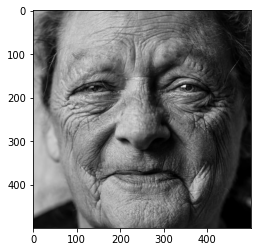

In [162]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [163]:
!pip uninstall opencv-python-headless -y

Found existing installation: opencv-python-headless 4.5.2.54
Uninstalling opencv-python-headless-4.5.2.54:
  Successfully uninstalled opencv-python-headless-4.5.2.54


In [164]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [57]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [58]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [59]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [60]:
!{command}

2021-06-23 08:02:37.911621: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-06-23 08:02:43.171894: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-06-23 08:02:43.171918: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-06-23 08:02:43.176230: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: RACHAN-PC
2021-06-23 08:02:43.176303: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: RACHAN-PC
2021-06-23 08:02:43.176705: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with 

W0623 08:03:03.788339 20180 save_impl.py:76] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x000001A383561C10>, because it is not built.
W0623 08:03:03.788339 20180 save_impl.py:76] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x000001A381E18850>, because it is not built.
W0623 08:03:03.789337 20180 save_impl.py:76] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x000001A381E18520>, because it is not built.
W0623 08:03:03.789337 20180 save_impl.py:76] Skipping full serialization of Keras layer <object_detection.core.freezable_batch_norm.FreezableBatchNorm object at 0x000001A38238B220>, because it is not built.
W0623 08:03:03.789337 20180 save_impl.py:76] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.core.Lambda object at 0x000001A38238B790>, because it is not built.
W0623 08:03:03.789337 

# 11. Conversion to TFJS

In [61]:
!pip install tensorflowjs

In [62]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [63]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [64]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2021-06-23 08:06:13.516837: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-06-23 08:06:49.804935: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-06-23 08:06:49.804975: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-06-23 08:06:49.813645: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: RACHAN-PC
2021-06-23 08:06:49.813754: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: RACHAN-PC
2021-06-23 08:06:49.814146: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with 

In [65]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [66]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [67]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [68]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [69]:
!{command}

2021-06-23 08:08:57.053098: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-06-23 08:09:03.828417: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-06-23 08:09:03.828440: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-06-23 08:09:03.833231: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: RACHAN-PC
2021-06-23 08:09:03.833300: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: RACHAN-PC
2021-06-23 08:09:03.833697: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with 

In [70]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [71]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [72]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [73]:
!{command}

2021-06-23 08:10:24.687494: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2021-06-23 08:10:33.837395: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2021-06-23 08:10:33.837420: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-06-23 08:10:33.841997: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: RACHAN-PC
2021-06-23 08:10:33.842066: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: RACHAN-PC
2021-06-23 08:10:33.842443: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with 

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')